In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [6]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [17]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

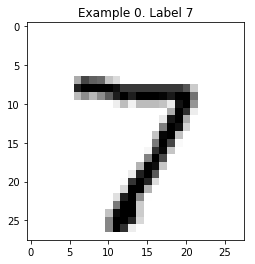

In [19]:
display(0)

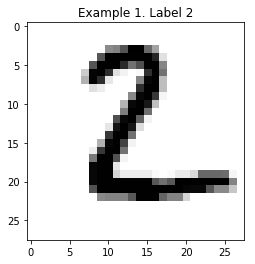

In [20]:
display(1)

In [21]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(n_classes=10, feature_columns=feature_columns)
classifier.fit(data, labels, batch_size=100, steps=1000)

C:\ProgramData\Anaconda2\envs\py35\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000000000CFA6080>, 'optimizer': None, 'joint_weights': False, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'gradient_clip_norm': None})

In [22]:
classifier.evaluate(test_data, test_labels)

C:\ProgramData\Anaconda2\envs\py35\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


{'accuracy': 0.92159998,
 'auc': 0.99252623,
 'global_step': 1000,
 'loss': 0.28329816}

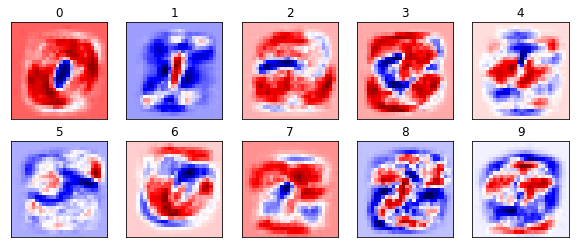

In [24]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28,28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())
    a.set_yticks(())
plt.show()